In [2]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Build CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.8741 - loss: 0.4320 - val_accuracy: 0.9835 - val_loss: 0.0551
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9858 - val_loss: 0.0511
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9882 - val_loss: 0.0415
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9911 - loss: 0.0303 - val_accuracy: 0.9900 - val_loss: 0.0378
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9907 - val_loss: 0.0387


In [6]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9886 - loss: 0.0378
Test Accuracy: 0.9900


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


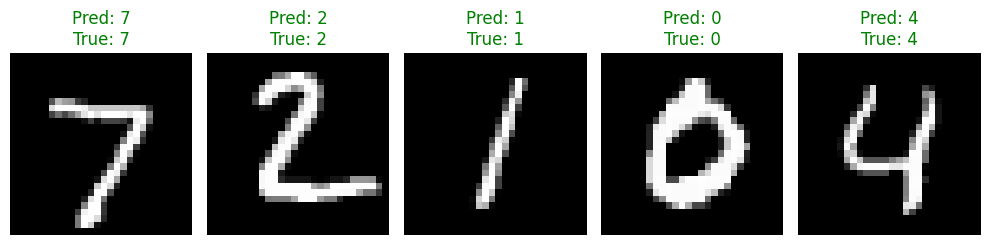

In [7]:
# Predict and visualize 5 samples
predictions = model.predict(x_test)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = np.argmax(predictions[i])
    true = y_test[i]
    plt.title(f"Pred: {pred}\nTrue: {true}", color='green' if pred == true else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()
